# Support Vector Machine ATLAS DATA

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
#load in data
data=pd.read_csv('ATLAS-data.csv', delimiter=',',header=None)
labels=pd.read_csv('ATLAS-labels.csv', delimiter=',',header=None)
print(data.shape)
print(data.head())
print(data.info())
print(data.describe())

(10000, 30)
        0       1        2        3      4        5      6      7       8   \
0  243.128  96.455  158.618   90.253  0.693   56.238  1.581  3.615  13.597   
1  139.751  74.028  111.619   44.266  2.119  104.723 -0.498  2.533   9.437   
2  116.217  73.136   59.239  101.850  0.625   85.539  2.979  1.922  28.049   
3   64.544   0.099   28.945  341.418  2.390  358.936 -1.181  0.714  35.293   
4   32.281  67.393   26.006   29.088  1.330  108.191 -0.362  0.846  48.389   

        9   ...     20       21   22       23     24     25      26     27  \
0  264.586  ...  2.121  376.410  3.0   46.248 -0.958 -0.444  42.759 -1.651   
1  168.638  ...  0.447  252.698  2.0   36.798  0.269 -1.254  31.816 -1.849   
2  202.636  ...  1.816  271.485  2.0   82.453  2.066 -1.210  58.216  1.442   
3  508.349  ... -2.409  470.806  3.0  331.152 -1.693  0.615  41.742  0.697   
4  152.087  ... -1.421  244.220  2.0   48.198  0.949  1.517  40.382 -0.382   

      28       29  
0 -1.445  157.638  
1  0.664  

In [3]:
#Check for missign values
total=data.isnull().sum().sort_values(ascending=False)
percent = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])


,Total,Percent
29,0,0.0
28,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0


In [9]:
#Drop category labels and gender labels
X=data
y=labels.values.ravel()

In [10]:
#Normalise the data between 0 and 1
sc=StandardScaler()
X_scaled_data = sc.fit_transform(data)

In [6]:
#Sample data to work through the probelm with
sample_data=X_scaled_data[0:500]
sample_labels=y[0:500]

In [11]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y,test_size = 0.3, random_state=42)   #scale the test data as well


In [12]:
#Initiate the classifier
clf = SVC() # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
#Print out the statistics from the classifier
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

So, Our accuracy Score is: 0.8007
[[1284  257]
 [ 341 1118]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1541
           1       0.81      0.77      0.79      1459

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



0.799751725622565


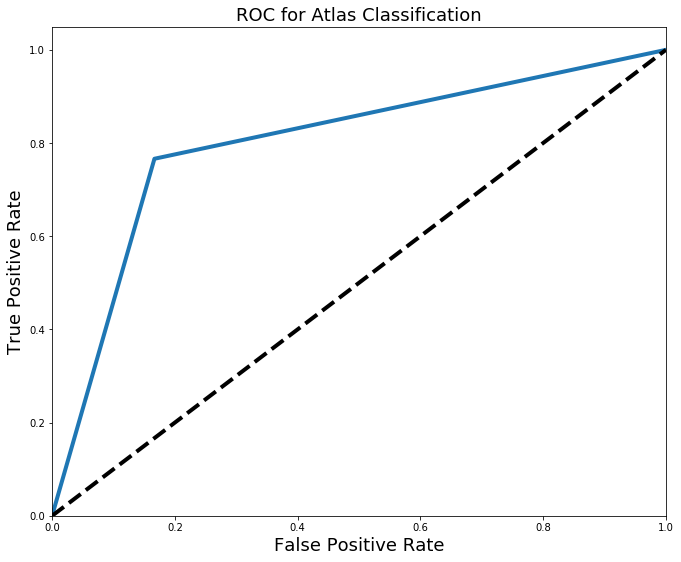

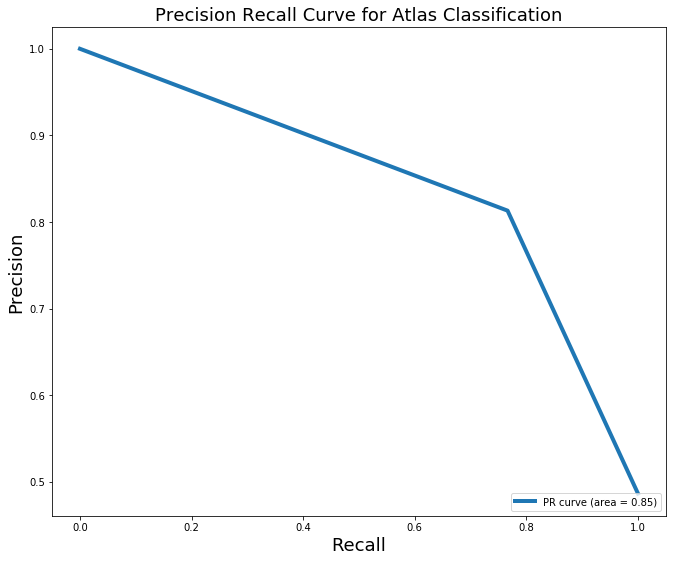

In [14]:
#Validating the fit
#AUC & ROC Curve
FPR, TPR, _ = roc_curve(y_test, y_pred)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Atlas Classification', fontsize= 18)
plt.show()
#Precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Atlas Classification', fontsize=18)
plt.legend(loc="lower right")
plt.show()


In [15]:
#Now with cross validation 10 fold
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .3, random_state = 42 )
accuracies = cross_val_score(clf, X_train,y_train, cv  = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packa

Cross-Validation accuracy scores:[0.81142857 0.81095238 0.81428571 0.79904762 0.82095238 0.81666667
 0.82238095 0.81714286 0.82095238 0.81619048]
Mean Cross-Validation accuracy score: 0.815


In [17]:
#initiate grid search kernel before optimising other parameters
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .3, random_state = 42 )
paramgrid = {"kernel" :["linear", "rbf", "poly"]}
model=SVC()
model_kernel = GridSearchCV(model,paramgrid,cv=cv,iid=False)
model_kernel.fit(X_train,y_train)


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packa

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=42, test_size=0.3,
            train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=None,
             param_grid={'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
print(model_kernel.best_params_)
print(model_kernel.best_score_)

{'kernel': 'rbf'}
0.8150000000000001


In [22]:
#initiate grid search with optimum parameters 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .3, random_state = 42 )
paramgrid = {"C":[0.1,1,10,100],"gamma":[1e-4,0.1,1,10,100]}
model=SVC(kernel='rbf')
model_grid = GridSearchCV(model,paramgrid,cv=cv,iid=False,verbose=10)
model_grid.fit(X_train,y_train)
print(model_grid.best_params_)
print(model_grid.best_score_)

svc_ran_grid = model_grid.best_estimator_
svc_ran_grid.score(X_test,y_test)
y_pred = svc_ran_grid.predict(X_test)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. C=0.1, gamma=0.0001, score=0.539, total=   5.0s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.539, total=   5.0s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.1s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.539, total=   5.1s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.1s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.539, total=   5.0s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.1s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.539, total=   5.0s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.2s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.539, total=   3.6s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   28.8s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.539, total=   1.7s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   30.5s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.539, total=   1.7s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   32.2s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.539, total=   1.7s
[CV] C=0.1, gamma=0.0001 .............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   34.0s remaining:    0.0s


[CV] ................. C=0.1, gamma=0.0001, score=0.539, total=   1.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.730, total=   1.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.721, total=   1.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.728, total=   1.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.710, total=   1.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.731, total=   1.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.719, total=   1.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ...................... C=1, gamma=0.1, score=0.799, total=   4.2s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.814, total=   4.3s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.799, total=   4.2s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.540, total=   6.4s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.541, total=   6.4s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.540, total=   6.5s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.540, total=   6.4s
[CV] C=1, gamma=1 ....................................................
[CV] .

[CV] ....................... C=10, gamma=1, score=0.543, total=   6.8s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.543, total=   6.7s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.541, total=   6.8s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.545, total=   6.7s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.544, total=   6.7s
[CV] C=10, gamma=10 ..................................................
[CV] ...................... C=10, gamma=10, score=0.539, total=   6.1s
[CV] C=10, gamma=10 ..................................................
[CV] ...................... C=10, gamma=10, score=0.539, total=   6.1s
[CV] C=10, gamma=10 ..................................................
[CV] .

[CV] ..................... C=100, gamma=10, score=0.539, total=   2.0s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.539, total=   2.0s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.539, total=   2.0s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.539, total=   2.0s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.539, total=   2.0s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.539, total=   2.0s
[CV] C=100, gamma=10 .................................................
[CV] ..................... C=100, gamma=10, score=0.539, total=   2.0s
[CV] C=100, gamma=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 12.8min finished


{'C': 1, 'gamma': 0.1}
0.8007619047619048


In [23]:
#Initiate the classifier
clf = SVC(kernel='rbf', C=1,gamma=0.1,verbose=True) # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)


[LibSVM]

In [24]:
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .3, random_state = 42 )
accuracies = cross_val_score(clf, X_train,y_train, cv  = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Cross-Validation accuracy scores:[0.8047619  0.79047619 0.8052381  0.78190476 0.8047619  0.8
 0.80904762 0.79857143 0.81380952 0.79904762]
Mean Cross-Validation accuracy score: 0.80076


So, Our accuracy Score is: 0.7943
[[1298  243]
 [ 374 1085]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1541
           1       0.82      0.74      0.78      1459

    accuracy                           0.79      3000
   macro avg       0.80      0.79      0.79      3000
weighted avg       0.80      0.79      0.79      3000

0.7929851146567725


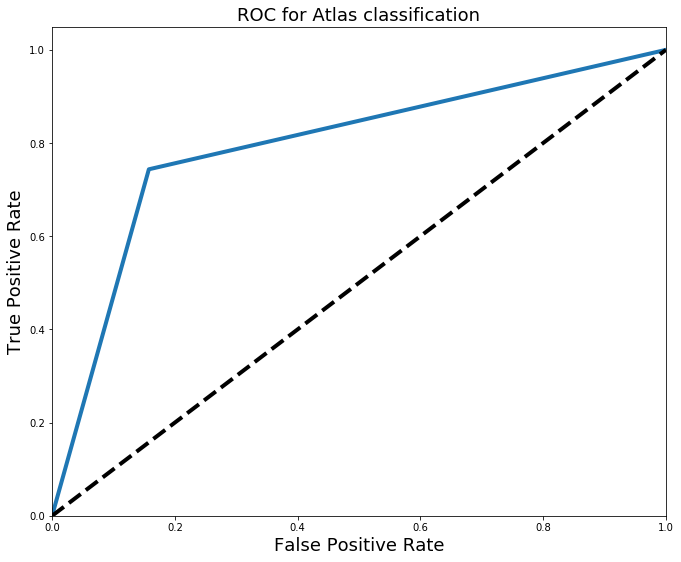

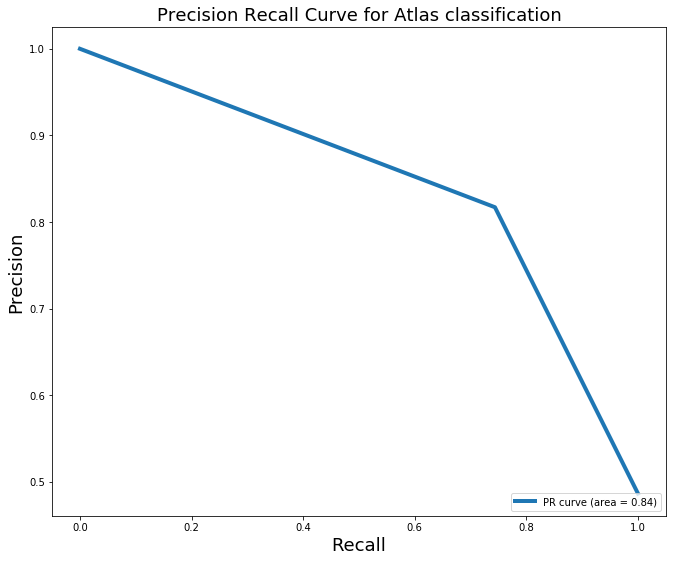

In [25]:
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

FPR, TPR, _ = roc_curve(y_test, y_pred)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Atlas classification', fontsize= 18)
plt.show()
#Precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Atlas classification', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Ensemble models for supervised learning

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


In [37]:
#Initiate the classifier
clf = RandomForestClassifier() # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
#Print out the statistics from the classifier
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

So, Our accuracy Score is: 0.7977
[[1320  221]
 [ 386 1073]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1541
           1       0.83      0.74      0.78      1459

    accuracy                           0.80      3000
   macro avg       0.80      0.80      0.80      3000
weighted avg       0.80      0.80      0.80      3000



In [44]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=42)
paramgrid = {'n_estimators':np.arange(1,50),'max_depth':np.arange(1,10)}
model=RandomForestClassifier()
model_grid = GridSearchCV(model,paramgrid,cv=cv,iid=False,verbose=10)
model_grid.fit(X_train,y_train)
print(model_grid.best_params_)
print(model_grid.best_score_)

RF_grid = model_grid.best_estimator_
RF_grid.score(X_test,y_test)
y_pred = RF_grid.predict(X_test)

Fitting 10 folds for each of 441 candidates, totalling 4410 fits
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ......... max_depth=1, n_estimators=1, score=0.588, total=   0.0s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ......... max_depth=1, n_estimators=1, score=0.537, total=   0.0s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ......... max_depth=1, n_estimators=1, score=0.664, total=   0.0s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ......... max_depth=1, n_estimators=1, score=0.643, total=   0.0s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ......... max_depth=1, n_estimators=1, score=0.655, total=   0.0s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] ......... max_depth=1, n_estimators=1, score=0.716, total=   0.0s
[CV] max_depth=1, n_estimators=1 .....................................
[CV] .......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV] ......... max_depth=1, n_estimators=1, score=0.592, total=   0.0s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ......... max_depth=1, n_estimators=2, score=0.671, total=   0.0s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ......... max_depth=1, n_estimators=2, score=0.670, total=   0.0s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ......... max_depth=1, n_estimators=2, score=0.639, total=   0.0s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ......... max_depth=1, n_estimators=2, score=0.755, total=   0.0s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ......... max_depth=1, n_estimators=2, score=0.757, total=   0.0s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] ......... max_depth=1, n_estimators=2, score=0.654, total=   0.0s
[CV] max_depth=1, n_estimators=2 .....................................
[CV] .

[CV] ......... max_depth=1, n_estimators=7, score=0.732, total=   0.1s
[CV] max_depth=1, n_estimators=7 .....................................
[CV] ......... max_depth=1, n_estimators=7, score=0.677, total=   0.1s
[CV] max_depth=1, n_estimators=8 .....................................
[CV] ......... max_depth=1, n_estimators=8, score=0.737, total=   0.1s
[CV] max_depth=1, n_estimators=8 .....................................
[CV] ......... max_depth=1, n_estimators=8, score=0.707, total=   0.1s
[CV] max_depth=1, n_estimators=8 .....................................
[CV] ......... max_depth=1, n_estimators=8, score=0.674, total=   0.1s
[CV] max_depth=1, n_estimators=8 .....................................
[CV] ......... max_depth=1, n_estimators=8, score=0.676, total=   0.0s
[CV] max_depth=1, n_estimators=8 .....................................
[CV] ......... max_depth=1, n_estimators=8, score=0.762, total=   0.0s
[CV] max_depth=1, n_estimators=8 .....................................
[CV] .

[CV] ........ max_depth=1, n_estimators=13, score=0.689, total=   0.1s
[CV] max_depth=1, n_estimators=13 ....................................
[CV] ........ max_depth=1, n_estimators=13, score=0.690, total=   0.1s
[CV] max_depth=1, n_estimators=13 ....................................
[CV] ........ max_depth=1, n_estimators=13, score=0.738, total=   0.1s
[CV] max_depth=1, n_estimators=13 ....................................
[CV] ........ max_depth=1, n_estimators=13, score=0.708, total=   0.1s
[CV] max_depth=1, n_estimators=14 ....................................
[CV] ........ max_depth=1, n_estimators=14, score=0.717, total=   0.1s
[CV] max_depth=1, n_estimators=14 ....................................
[CV] ........ max_depth=1, n_estimators=14, score=0.699, total=   0.1s
[CV] max_depth=1, n_estimators=14 ....................................
[CV] ........ max_depth=1, n_estimators=14, score=0.699, total=   0.1s
[CV] max_depth=1, n_estimators=14 ....................................
[CV] .

[CV] ........ max_depth=1, n_estimators=19, score=0.710, total=   0.1s
[CV] max_depth=1, n_estimators=19 ....................................
[CV] ........ max_depth=1, n_estimators=19, score=0.742, total=   0.1s
[CV] max_depth=1, n_estimators=19 ....................................
[CV] ........ max_depth=1, n_estimators=19, score=0.736, total=   0.1s
[CV] max_depth=1, n_estimators=19 ....................................
[CV] ........ max_depth=1, n_estimators=19, score=0.716, total=   0.1s
[CV] max_depth=1, n_estimators=19 ....................................
[CV] ........ max_depth=1, n_estimators=19, score=0.691, total=   0.1s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ........ max_depth=1, n_estimators=20, score=0.737, total=   0.1s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] ........ max_depth=1, n_estimators=20, score=0.711, total=   0.1s
[CV] max_depth=1, n_estimators=20 ....................................
[CV] .

[CV] ........ max_depth=1, n_estimators=25, score=0.687, total=   0.1s
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ........ max_depth=1, n_estimators=25, score=0.710, total=   0.1s
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ........ max_depth=1, n_estimators=25, score=0.699, total=   0.1s
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ........ max_depth=1, n_estimators=25, score=0.716, total=   0.1s
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ........ max_depth=1, n_estimators=25, score=0.756, total=   0.1s
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ........ max_depth=1, n_estimators=25, score=0.714, total=   0.1s
[CV] max_depth=1, n_estimators=25 ....................................
[CV] ........ max_depth=1, n_estimators=25, score=0.730, total=   0.1s
[CV] max_depth=1, n_estimators=26 ....................................
[CV] .

[CV] ........ max_depth=1, n_estimators=31, score=0.720, total=   0.1s
[CV] max_depth=1, n_estimators=31 ....................................
[CV] ........ max_depth=1, n_estimators=31, score=0.730, total=   0.1s
[CV] max_depth=1, n_estimators=31 ....................................
[CV] ........ max_depth=1, n_estimators=31, score=0.728, total=   0.1s
[CV] max_depth=1, n_estimators=31 ....................................
[CV] ........ max_depth=1, n_estimators=31, score=0.730, total=   0.1s
[CV] max_depth=1, n_estimators=31 ....................................
[CV] ........ max_depth=1, n_estimators=31, score=0.727, total=   0.1s
[CV] max_depth=1, n_estimators=31 ....................................
[CV] ........ max_depth=1, n_estimators=31, score=0.702, total=   0.1s
[CV] max_depth=1, n_estimators=31 ....................................
[CV] ........ max_depth=1, n_estimators=31, score=0.727, total=   0.1s
[CV] max_depth=1, n_estimators=32 ....................................
[CV] .

[CV] ........ max_depth=1, n_estimators=37, score=0.703, total=   0.3s
[CV] max_depth=1, n_estimators=37 ....................................
[CV] ........ max_depth=1, n_estimators=37, score=0.707, total=   0.3s
[CV] max_depth=1, n_estimators=37 ....................................
[CV] ........ max_depth=1, n_estimators=37, score=0.702, total=   0.3s
[CV] max_depth=1, n_estimators=37 ....................................
[CV] ........ max_depth=1, n_estimators=37, score=0.727, total=   0.1s
[CV] max_depth=1, n_estimators=37 ....................................
[CV] ........ max_depth=1, n_estimators=37, score=0.714, total=   0.3s
[CV] max_depth=1, n_estimators=37 ....................................
[CV] ........ max_depth=1, n_estimators=37, score=0.743, total=   0.3s
[CV] max_depth=1, n_estimators=37 ....................................
[CV] ........ max_depth=1, n_estimators=37, score=0.709, total=   0.3s
[CV] max_depth=1, n_estimators=37 ....................................
[CV] .

[CV] ........ max_depth=1, n_estimators=43, score=0.705, total=   0.1s
[CV] max_depth=1, n_estimators=43 ....................................
[CV] ........ max_depth=1, n_estimators=43, score=0.717, total=   0.1s
[CV] max_depth=1, n_estimators=43 ....................................
[CV] ........ max_depth=1, n_estimators=43, score=0.718, total=   0.1s
[CV] max_depth=1, n_estimators=43 ....................................
[CV] ........ max_depth=1, n_estimators=43, score=0.704, total=   0.1s
[CV] max_depth=1, n_estimators=43 ....................................
[CV] ........ max_depth=1, n_estimators=43, score=0.687, total=   0.1s
[CV] max_depth=1, n_estimators=43 ....................................
[CV] ........ max_depth=1, n_estimators=43, score=0.732, total=   0.1s
[CV] max_depth=1, n_estimators=43 ....................................
[CV] ........ max_depth=1, n_estimators=43, score=0.718, total=   0.1s
[CV] max_depth=1, n_estimators=43 ....................................
[CV] .

[CV] ........ max_depth=1, n_estimators=48, score=0.698, total=   0.1s
[CV] max_depth=1, n_estimators=49 ....................................
[CV] ........ max_depth=1, n_estimators=49, score=0.705, total=   0.1s
[CV] max_depth=1, n_estimators=49 ....................................
[CV] ........ max_depth=1, n_estimators=49, score=0.725, total=   0.1s
[CV] max_depth=1, n_estimators=49 ....................................
[CV] ........ max_depth=1, n_estimators=49, score=0.747, total=   0.1s
[CV] max_depth=1, n_estimators=49 ....................................
[CV] ........ max_depth=1, n_estimators=49, score=0.708, total=   0.1s
[CV] max_depth=1, n_estimators=49 ....................................
[CV] ........ max_depth=1, n_estimators=49, score=0.711, total=   0.1s
[CV] max_depth=1, n_estimators=49 ....................................
[CV] ........ max_depth=1, n_estimators=49, score=0.726, total=   0.1s
[CV] max_depth=1, n_estimators=49 ....................................
[CV] .

[CV] ......... max_depth=2, n_estimators=6, score=0.767, total=   0.0s
[CV] max_depth=2, n_estimators=6 .....................................
[CV] ......... max_depth=2, n_estimators=6, score=0.730, total=   0.0s
[CV] max_depth=2, n_estimators=6 .....................................
[CV] ......... max_depth=2, n_estimators=6, score=0.743, total=   0.0s
[CV] max_depth=2, n_estimators=6 .....................................
[CV] ......... max_depth=2, n_estimators=6, score=0.729, total=   0.0s
[CV] max_depth=2, n_estimators=6 .....................................
[CV] ......... max_depth=2, n_estimators=6, score=0.714, total=   0.0s
[CV] max_depth=2, n_estimators=6 .....................................
[CV] ......... max_depth=2, n_estimators=6, score=0.721, total=   0.0s
[CV] max_depth=2, n_estimators=7 .....................................
[CV] ......... max_depth=2, n_estimators=7, score=0.718, total=   0.0s
[CV] max_depth=2, n_estimators=7 .....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=12, score=0.747, total=   0.0s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] ........ max_depth=2, n_estimators=12, score=0.766, total=   0.0s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] ........ max_depth=2, n_estimators=12, score=0.756, total=   0.0s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] ........ max_depth=2, n_estimators=12, score=0.792, total=   0.0s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] ........ max_depth=2, n_estimators=12, score=0.792, total=   0.0s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] ........ max_depth=2, n_estimators=12, score=0.709, total=   0.1s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] ........ max_depth=2, n_estimators=12, score=0.740, total=   0.0s
[CV] max_depth=2, n_estimators=12 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=18, score=0.757, total=   0.1s
[CV] max_depth=2, n_estimators=18 ....................................
[CV] ........ max_depth=2, n_estimators=18, score=0.764, total=   0.1s
[CV] max_depth=2, n_estimators=18 ....................................
[CV] ........ max_depth=2, n_estimators=18, score=0.730, total=   0.1s
[CV] max_depth=2, n_estimators=18 ....................................
[CV] ........ max_depth=2, n_estimators=18, score=0.714, total=   0.1s
[CV] max_depth=2, n_estimators=18 ....................................
[CV] ........ max_depth=2, n_estimators=18, score=0.766, total=   0.1s
[CV] max_depth=2, n_estimators=18 ....................................
[CV] ........ max_depth=2, n_estimators=18, score=0.750, total=   0.1s
[CV] max_depth=2, n_estimators=18 ....................................
[CV] ........ max_depth=2, n_estimators=18, score=0.739, total=   0.1s
[CV] max_depth=2, n_estimators=18 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=24, score=0.771, total=   0.1s
[CV] max_depth=2, n_estimators=24 ....................................
[CV] ........ max_depth=2, n_estimators=24, score=0.753, total=   0.1s
[CV] max_depth=2, n_estimators=24 ....................................
[CV] ........ max_depth=2, n_estimators=24, score=0.735, total=   0.1s
[CV] max_depth=2, n_estimators=24 ....................................
[CV] ........ max_depth=2, n_estimators=24, score=0.743, total=   0.1s
[CV] max_depth=2, n_estimators=24 ....................................
[CV] ........ max_depth=2, n_estimators=24, score=0.743, total=   0.3s
[CV] max_depth=2, n_estimators=24 ....................................
[CV] ........ max_depth=2, n_estimators=24, score=0.707, total=   0.3s
[CV] max_depth=2, n_estimators=24 ....................................
[CV] ........ max_depth=2, n_estimators=24, score=0.711, total=   0.3s
[CV] max_depth=2, n_estimators=24 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=29, score=0.738, total=   0.4s
[CV] max_depth=2, n_estimators=29 ....................................
[CV] ........ max_depth=2, n_estimators=29, score=0.740, total=   0.3s
[CV] max_depth=2, n_estimators=30 ....................................
[CV] ........ max_depth=2, n_estimators=30, score=0.751, total=   0.4s
[CV] max_depth=2, n_estimators=30 ....................................
[CV] ........ max_depth=2, n_estimators=30, score=0.771, total=   0.4s
[CV] max_depth=2, n_estimators=30 ....................................
[CV] ........ max_depth=2, n_estimators=30, score=0.720, total=   0.4s
[CV] max_depth=2, n_estimators=30 ....................................
[CV] ........ max_depth=2, n_estimators=30, score=0.735, total=   0.4s
[CV] max_depth=2, n_estimators=30 ....................................
[CV] ........ max_depth=2, n_estimators=30, score=0.755, total=   0.4s
[CV] max_depth=2, n_estimators=30 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=35, score=0.771, total=   0.4s
[CV] max_depth=2, n_estimators=35 ....................................
[CV] ........ max_depth=2, n_estimators=35, score=0.765, total=   0.4s
[CV] max_depth=2, n_estimators=35 ....................................
[CV] ........ max_depth=2, n_estimators=35, score=0.753, total=   0.4s
[CV] max_depth=2, n_estimators=35 ....................................
[CV] ........ max_depth=2, n_estimators=35, score=0.729, total=   0.4s
[CV] max_depth=2, n_estimators=36 ....................................
[CV] ........ max_depth=2, n_estimators=36, score=0.750, total=   0.4s
[CV] max_depth=2, n_estimators=36 ....................................
[CV] ........ max_depth=2, n_estimators=36, score=0.759, total=   0.4s
[CV] max_depth=2, n_estimators=36 ....................................
[CV] ........ max_depth=2, n_estimators=36, score=0.757, total=   0.4s
[CV] max_depth=2, n_estimators=36 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=41, score=0.733, total=   0.5s
[CV] max_depth=2, n_estimators=41 ....................................
[CV] ........ max_depth=2, n_estimators=41, score=0.719, total=   0.5s
[CV] max_depth=2, n_estimators=41 ....................................
[CV] ........ max_depth=2, n_estimators=41, score=0.758, total=   0.5s
[CV] max_depth=2, n_estimators=41 ....................................
[CV] ........ max_depth=2, n_estimators=41, score=0.785, total=   0.5s
[CV] max_depth=2, n_estimators=41 ....................................
[CV] ........ max_depth=2, n_estimators=41, score=0.783, total=   0.5s
[CV] max_depth=2, n_estimators=41 ....................................
[CV] ........ max_depth=2, n_estimators=41, score=0.735, total=   0.5s
[CV] max_depth=2, n_estimators=42 ....................................
[CV] ........ max_depth=2, n_estimators=42, score=0.783, total=   0.5s
[CV] max_depth=2, n_estimators=42 ....................................
[CV] .

[CV] ........ max_depth=2, n_estimators=47, score=0.754, total=   0.6s
[CV] max_depth=2, n_estimators=47 ....................................
[CV] ........ max_depth=2, n_estimators=47, score=0.736, total=   0.6s
[CV] max_depth=2, n_estimators=47 ....................................
[CV] ........ max_depth=2, n_estimators=47, score=0.702, total=   0.6s
[CV] max_depth=2, n_estimators=47 ....................................
[CV] ........ max_depth=2, n_estimators=47, score=0.777, total=   0.6s
[CV] max_depth=2, n_estimators=47 ....................................
[CV] ........ max_depth=2, n_estimators=47, score=0.770, total=   0.6s
[CV] max_depth=2, n_estimators=47 ....................................
[CV] ........ max_depth=2, n_estimators=47, score=0.726, total=   0.6s
[CV] max_depth=2, n_estimators=47 ....................................
[CV] ........ max_depth=2, n_estimators=47, score=0.768, total=   0.6s
[CV] max_depth=2, n_estimators=47 ....................................
[CV] .

[CV] ......... max_depth=3, n_estimators=4, score=0.758, total=   0.1s
[CV] max_depth=3, n_estimators=4 .....................................
[CV] ......... max_depth=3, n_estimators=4, score=0.716, total=   0.1s
[CV] max_depth=3, n_estimators=4 .....................................
[CV] ......... max_depth=3, n_estimators=4, score=0.795, total=   0.1s
[CV] max_depth=3, n_estimators=4 .....................................
[CV] ......... max_depth=3, n_estimators=4, score=0.777, total=   0.1s
[CV] max_depth=3, n_estimators=4 .....................................
[CV] ......... max_depth=3, n_estimators=4, score=0.758, total=   0.1s
[CV] max_depth=3, n_estimators=4 .....................................
[CV] ......... max_depth=3, n_estimators=4, score=0.754, total=   0.1s
[CV] max_depth=3, n_estimators=4 .....................................
[CV] ......... max_depth=3, n_estimators=4, score=0.798, total=   0.1s
[CV] max_depth=3, n_estimators=5 .....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=10, score=0.771, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.762, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.750, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.764, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.765, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.798, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ........ max_depth=3, n_estimators=10, score=0.768, total=   0.1s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=15, score=0.772, total=   0.1s
[CV] max_depth=3, n_estimators=16 ....................................
[CV] ........ max_depth=3, n_estimators=16, score=0.805, total=   0.1s
[CV] max_depth=3, n_estimators=16 ....................................
[CV] ........ max_depth=3, n_estimators=16, score=0.787, total=   0.1s
[CV] max_depth=3, n_estimators=16 ....................................
[CV] ........ max_depth=3, n_estimators=16, score=0.802, total=   0.1s
[CV] max_depth=3, n_estimators=16 ....................................
[CV] ........ max_depth=3, n_estimators=16, score=0.745, total=   0.1s
[CV] max_depth=3, n_estimators=16 ....................................
[CV] ........ max_depth=3, n_estimators=16, score=0.801, total=   0.1s
[CV] max_depth=3, n_estimators=16 ....................................
[CV] ........ max_depth=3, n_estimators=16, score=0.789, total=   0.1s
[CV] max_depth=3, n_estimators=16 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=21, score=0.783, total=   0.1s
[CV] max_depth=3, n_estimators=21 ....................................
[CV] ........ max_depth=3, n_estimators=21, score=0.807, total=   0.3s
[CV] max_depth=3, n_estimators=22 ....................................
[CV] ........ max_depth=3, n_estimators=22, score=0.796, total=   0.3s
[CV] max_depth=3, n_estimators=22 ....................................
[CV] ........ max_depth=3, n_estimators=22, score=0.802, total=   0.3s
[CV] max_depth=3, n_estimators=22 ....................................
[CV] ........ max_depth=3, n_estimators=22, score=0.808, total=   0.3s
[CV] max_depth=3, n_estimators=22 ....................................
[CV] ........ max_depth=3, n_estimators=22, score=0.748, total=   0.3s
[CV] max_depth=3, n_estimators=22 ....................................
[CV] ........ max_depth=3, n_estimators=22, score=0.799, total=   0.3s
[CV] max_depth=3, n_estimators=22 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=27, score=0.789, total=   0.4s
[CV] max_depth=3, n_estimators=27 ....................................
[CV] ........ max_depth=3, n_estimators=27, score=0.796, total=   0.4s
[CV] max_depth=3, n_estimators=27 ....................................
[CV] ........ max_depth=3, n_estimators=27, score=0.791, total=   0.4s
[CV] max_depth=3, n_estimators=27 ....................................
[CV] ........ max_depth=3, n_estimators=27, score=0.782, total=   0.4s
[CV] max_depth=3, n_estimators=28 ....................................
[CV] ........ max_depth=3, n_estimators=28, score=0.777, total=   0.4s
[CV] max_depth=3, n_estimators=28 ....................................
[CV] ........ max_depth=3, n_estimators=28, score=0.781, total=   0.4s
[CV] max_depth=3, n_estimators=28 ....................................
[CV] ........ max_depth=3, n_estimators=28, score=0.782, total=   0.4s
[CV] max_depth=3, n_estimators=28 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=33, score=0.801, total=   0.2s
[CV] max_depth=3, n_estimators=33 ....................................
[CV] ........ max_depth=3, n_estimators=33, score=0.795, total=   0.2s
[CV] max_depth=3, n_estimators=33 ....................................
[CV] ........ max_depth=3, n_estimators=33, score=0.799, total=   0.2s
[CV] max_depth=3, n_estimators=33 ....................................
[CV] ........ max_depth=3, n_estimators=33, score=0.784, total=   0.2s
[CV] max_depth=3, n_estimators=33 ....................................
[CV] ........ max_depth=3, n_estimators=33, score=0.782, total=   0.2s
[CV] max_depth=3, n_estimators=33 ....................................
[CV] ........ max_depth=3, n_estimators=33, score=0.767, total=   0.2s
[CV] max_depth=3, n_estimators=34 ....................................
[CV] ........ max_depth=3, n_estimators=34, score=0.781, total=   0.2s
[CV] max_depth=3, n_estimators=34 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=39, score=0.780, total=   0.6s
[CV] max_depth=3, n_estimators=39 ....................................
[CV] ........ max_depth=3, n_estimators=39, score=0.765, total=   0.7s
[CV] max_depth=3, n_estimators=39 ....................................
[CV] ........ max_depth=3, n_estimators=39, score=0.771, total=   0.6s
[CV] max_depth=3, n_estimators=39 ....................................
[CV] ........ max_depth=3, n_estimators=39, score=0.776, total=   0.6s
[CV] max_depth=3, n_estimators=39 ....................................
[CV] ........ max_depth=3, n_estimators=39, score=0.794, total=   0.6s
[CV] max_depth=3, n_estimators=39 ....................................
[CV] ........ max_depth=3, n_estimators=39, score=0.776, total=   0.6s
[CV] max_depth=3, n_estimators=39 ....................................
[CV] ........ max_depth=3, n_estimators=39, score=0.810, total=   0.6s
[CV] max_depth=3, n_estimators=39 ....................................
[CV] .

[CV] ........ max_depth=3, n_estimators=45, score=0.777, total=   0.7s
[CV] max_depth=3, n_estimators=45 ....................................
[CV] ........ max_depth=3, n_estimators=45, score=0.791, total=   0.7s
[CV] max_depth=3, n_estimators=45 ....................................
[CV] ........ max_depth=3, n_estimators=45, score=0.792, total=   0.7s
[CV] max_depth=3, n_estimators=45 ....................................
[CV] ........ max_depth=3, n_estimators=45, score=0.781, total=   0.7s
[CV] max_depth=3, n_estimators=45 ....................................
[CV] ........ max_depth=3, n_estimators=45, score=0.808, total=   0.7s
[CV] max_depth=3, n_estimators=45 ....................................
[CV] ........ max_depth=3, n_estimators=45, score=0.762, total=   0.7s
[CV] max_depth=3, n_estimators=45 ....................................
[CV] ........ max_depth=3, n_estimators=45, score=0.800, total=   0.7s
[CV] max_depth=3, n_estimators=45 ....................................
[CV] .

[CV] ......... max_depth=4, n_estimators=2, score=0.740, total=   0.0s
[CV] max_depth=4, n_estimators=2 .....................................
[CV] ......... max_depth=4, n_estimators=2, score=0.771, total=   0.0s
[CV] max_depth=4, n_estimators=2 .....................................
[CV] ......... max_depth=4, n_estimators=2, score=0.775, total=   0.0s
[CV] max_depth=4, n_estimators=2 .....................................
[CV] ......... max_depth=4, n_estimators=2, score=0.719, total=   0.0s
[CV] max_depth=4, n_estimators=2 .....................................
[CV] ......... max_depth=4, n_estimators=2, score=0.771, total=   0.0s
[CV] max_depth=4, n_estimators=2 .....................................
[CV] ......... max_depth=4, n_estimators=2, score=0.747, total=   0.0s
[CV] max_depth=4, n_estimators=2 .....................................
[CV] ......... max_depth=4, n_estimators=2, score=0.748, total=   0.0s
[CV] max_depth=4, n_estimators=3 .....................................
[CV] .

[CV] ......... max_depth=4, n_estimators=8, score=0.814, total=   0.2s
[CV] max_depth=4, n_estimators=8 .....................................
[CV] ......... max_depth=4, n_estimators=8, score=0.780, total=   0.2s
[CV] max_depth=4, n_estimators=8 .....................................
[CV] ......... max_depth=4, n_estimators=8, score=0.808, total=   0.2s
[CV] max_depth=4, n_estimators=8 .....................................
[CV] ......... max_depth=4, n_estimators=8, score=0.815, total=   0.2s
[CV] max_depth=4, n_estimators=8 .....................................
[CV] ......... max_depth=4, n_estimators=8, score=0.793, total=   0.2s
[CV] max_depth=4, n_estimators=8 .....................................
[CV] ......... max_depth=4, n_estimators=8, score=0.796, total=   0.2s
[CV] max_depth=4, n_estimators=8 .....................................
[CV] ......... max_depth=4, n_estimators=8, score=0.781, total=   0.2s
[CV] max_depth=4, n_estimators=8 .....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=14, score=0.811, total=   0.3s
[CV] max_depth=4, n_estimators=14 ....................................
[CV] ........ max_depth=4, n_estimators=14, score=0.772, total=   0.3s
[CV] max_depth=4, n_estimators=14 ....................................
[CV] ........ max_depth=4, n_estimators=14, score=0.802, total=   0.3s
[CV] max_depth=4, n_estimators=14 ....................................
[CV] ........ max_depth=4, n_estimators=14, score=0.768, total=   0.3s
[CV] max_depth=4, n_estimators=14 ....................................
[CV] ........ max_depth=4, n_estimators=14, score=0.781, total=   0.3s
[CV] max_depth=4, n_estimators=14 ....................................
[CV] ........ max_depth=4, n_estimators=14, score=0.822, total=   0.3s
[CV] max_depth=4, n_estimators=14 ....................................
[CV] ........ max_depth=4, n_estimators=14, score=0.814, total=   0.3s
[CV] max_depth=4, n_estimators=14 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=19, score=0.805, total=   0.4s
[CV] max_depth=4, n_estimators=19 ....................................
[CV] ........ max_depth=4, n_estimators=19, score=0.805, total=   0.4s
[CV] max_depth=4, n_estimators=20 ....................................
[CV] ........ max_depth=4, n_estimators=20, score=0.783, total=   0.4s
[CV] max_depth=4, n_estimators=20 ....................................
[CV] ........ max_depth=4, n_estimators=20, score=0.799, total=   0.4s
[CV] max_depth=4, n_estimators=20 ....................................
[CV] ........ max_depth=4, n_estimators=20, score=0.806, total=   0.4s
[CV] max_depth=4, n_estimators=20 ....................................
[CV] ........ max_depth=4, n_estimators=20, score=0.776, total=   0.4s
[CV] max_depth=4, n_estimators=20 ....................................
[CV] ........ max_depth=4, n_estimators=20, score=0.789, total=   0.4s
[CV] max_depth=4, n_estimators=20 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=25, score=0.828, total=   0.5s
[CV] max_depth=4, n_estimators=25 ....................................
[CV] ........ max_depth=4, n_estimators=25, score=0.806, total=   0.5s
[CV] max_depth=4, n_estimators=25 ....................................
[CV] ........ max_depth=4, n_estimators=25, score=0.806, total=   0.5s
[CV] max_depth=4, n_estimators=25 ....................................
[CV] ........ max_depth=4, n_estimators=25, score=0.788, total=   0.5s
[CV] max_depth=4, n_estimators=26 ....................................
[CV] ........ max_depth=4, n_estimators=26, score=0.786, total=   0.5s
[CV] max_depth=4, n_estimators=26 ....................................
[CV] ........ max_depth=4, n_estimators=26, score=0.800, total=   0.4s
[CV] max_depth=4, n_estimators=26 ....................................
[CV] ........ max_depth=4, n_estimators=26, score=0.830, total=   0.2s
[CV] max_depth=4, n_estimators=26 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=31, score=0.823, total=   0.6s
[CV] max_depth=4, n_estimators=31 ....................................
[CV] ........ max_depth=4, n_estimators=31, score=0.819, total=   0.6s
[CV] max_depth=4, n_estimators=31 ....................................
[CV] ........ max_depth=4, n_estimators=31, score=0.831, total=   0.6s
[CV] max_depth=4, n_estimators=31 ....................................
[CV] ........ max_depth=4, n_estimators=31, score=0.810, total=   0.6s
[CV] max_depth=4, n_estimators=31 ....................................
[CV] ........ max_depth=4, n_estimators=31, score=0.803, total=   0.6s
[CV] max_depth=4, n_estimators=31 ....................................
[CV] ........ max_depth=4, n_estimators=31, score=0.803, total=   0.6s
[CV] max_depth=4, n_estimators=32 ....................................
[CV] ........ max_depth=4, n_estimators=32, score=0.788, total=   0.6s
[CV] max_depth=4, n_estimators=32 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=37, score=0.803, total=   0.7s
[CV] max_depth=4, n_estimators=37 ....................................
[CV] ........ max_depth=4, n_estimators=37, score=0.803, total=   0.7s
[CV] max_depth=4, n_estimators=37 ....................................
[CV] ........ max_depth=4, n_estimators=37, score=0.817, total=   0.7s
[CV] max_depth=4, n_estimators=37 ....................................
[CV] ........ max_depth=4, n_estimators=37, score=0.816, total=   0.7s
[CV] max_depth=4, n_estimators=37 ....................................
[CV] ........ max_depth=4, n_estimators=37, score=0.814, total=   0.7s
[CV] max_depth=4, n_estimators=37 ....................................
[CV] ........ max_depth=4, n_estimators=37, score=0.815, total=   0.7s
[CV] max_depth=4, n_estimators=37 ....................................
[CV] ........ max_depth=4, n_estimators=37, score=0.802, total=   0.7s
[CV] max_depth=4, n_estimators=37 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=43, score=0.804, total=   0.8s
[CV] max_depth=4, n_estimators=43 ....................................
[CV] ........ max_depth=4, n_estimators=43, score=0.812, total=   0.8s
[CV] max_depth=4, n_estimators=43 ....................................
[CV] ........ max_depth=4, n_estimators=43, score=0.818, total=   0.8s
[CV] max_depth=4, n_estimators=43 ....................................
[CV] ........ max_depth=4, n_estimators=43, score=0.780, total=   0.8s
[CV] max_depth=4, n_estimators=43 ....................................
[CV] ........ max_depth=4, n_estimators=43, score=0.823, total=   0.8s
[CV] max_depth=4, n_estimators=43 ....................................
[CV] ........ max_depth=4, n_estimators=43, score=0.813, total=   0.8s
[CV] max_depth=4, n_estimators=43 ....................................
[CV] ........ max_depth=4, n_estimators=43, score=0.826, total=   0.8s
[CV] max_depth=4, n_estimators=43 ....................................
[CV] .

[CV] ........ max_depth=4, n_estimators=48, score=0.798, total=   1.0s
[CV] max_depth=4, n_estimators=48 ....................................
[CV] ........ max_depth=4, n_estimators=48, score=0.800, total=   1.0s
[CV] max_depth=4, n_estimators=49 ....................................
[CV] ........ max_depth=4, n_estimators=49, score=0.803, total=   0.9s
[CV] max_depth=4, n_estimators=49 ....................................
[CV] ........ max_depth=4, n_estimators=49, score=0.779, total=   0.9s
[CV] max_depth=4, n_estimators=49 ....................................
[CV] ........ max_depth=4, n_estimators=49, score=0.815, total=   0.9s
[CV] max_depth=4, n_estimators=49 ....................................
[CV] ........ max_depth=4, n_estimators=49, score=0.785, total=   0.9s
[CV] max_depth=4, n_estimators=49 ....................................
[CV] ........ max_depth=4, n_estimators=49, score=0.815, total=   0.9s
[CV] max_depth=4, n_estimators=49 ....................................
[CV] .

[CV] ......... max_depth=5, n_estimators=5, score=0.799, total=   0.1s
[CV] max_depth=5, n_estimators=5 .....................................
[CV] ......... max_depth=5, n_estimators=5, score=0.791, total=   0.1s
[CV] max_depth=5, n_estimators=5 .....................................
[CV] ......... max_depth=5, n_estimators=5, score=0.809, total=   0.1s
[CV] max_depth=5, n_estimators=6 .....................................
[CV] ......... max_depth=5, n_estimators=6, score=0.802, total=   0.1s
[CV] max_depth=5, n_estimators=6 .....................................
[CV] ......... max_depth=5, n_estimators=6, score=0.815, total=   0.1s
[CV] max_depth=5, n_estimators=6 .....................................
[CV] ......... max_depth=5, n_estimators=6, score=0.818, total=   0.1s
[CV] max_depth=5, n_estimators=6 .....................................
[CV] ......... max_depth=5, n_estimators=6, score=0.791, total=   0.1s
[CV] max_depth=5, n_estimators=6 .....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=11, score=0.828, total=   0.2s
[CV] max_depth=5, n_estimators=11 ....................................
[CV] ........ max_depth=5, n_estimators=11, score=0.819, total=   0.2s
[CV] max_depth=5, n_estimators=11 ....................................
[CV] ........ max_depth=5, n_estimators=11, score=0.803, total=   0.2s
[CV] max_depth=5, n_estimators=11 ....................................
[CV] ........ max_depth=5, n_estimators=11, score=0.807, total=   0.2s
[CV] max_depth=5, n_estimators=11 ....................................
[CV] ........ max_depth=5, n_estimators=11, score=0.810, total=   0.2s
[CV] max_depth=5, n_estimators=12 ....................................
[CV] ........ max_depth=5, n_estimators=12, score=0.793, total=   0.3s
[CV] max_depth=5, n_estimators=12 ....................................
[CV] ........ max_depth=5, n_estimators=12, score=0.807, total=   0.3s
[CV] max_depth=5, n_estimators=12 ....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=17, score=0.795, total=   0.4s
[CV] max_depth=5, n_estimators=17 ....................................
[CV] ........ max_depth=5, n_estimators=17, score=0.824, total=   0.4s
[CV] max_depth=5, n_estimators=17 ....................................
[CV] ........ max_depth=5, n_estimators=17, score=0.824, total=   0.4s
[CV] max_depth=5, n_estimators=17 ....................................
[CV] ........ max_depth=5, n_estimators=17, score=0.820, total=   0.4s
[CV] max_depth=5, n_estimators=17 ....................................
[CV] ........ max_depth=5, n_estimators=17, score=0.813, total=   0.4s
[CV] max_depth=5, n_estimators=17 ....................................
[CV] ........ max_depth=5, n_estimators=17, score=0.806, total=   0.4s
[CV] max_depth=5, n_estimators=17 ....................................
[CV] ........ max_depth=5, n_estimators=17, score=0.803, total=   0.4s
[CV] max_depth=5, n_estimators=18 ....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=23, score=0.806, total=   0.5s
[CV] max_depth=5, n_estimators=23 ....................................
[CV] ........ max_depth=5, n_estimators=23, score=0.819, total=   0.5s
[CV] max_depth=5, n_estimators=23 ....................................
[CV] ........ max_depth=5, n_estimators=23, score=0.805, total=   0.5s
[CV] max_depth=5, n_estimators=23 ....................................
[CV] ........ max_depth=5, n_estimators=23, score=0.815, total=   0.5s
[CV] max_depth=5, n_estimators=23 ....................................
[CV] ........ max_depth=5, n_estimators=23, score=0.819, total=   0.5s
[CV] max_depth=5, n_estimators=23 ....................................
[CV] ........ max_depth=5, n_estimators=23, score=0.814, total=   0.5s
[CV] max_depth=5, n_estimators=23 ....................................
[CV] ........ max_depth=5, n_estimators=23, score=0.813, total=   0.5s
[CV] max_depth=5, n_estimators=23 ....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=28, score=0.814, total=   0.2s
[CV] max_depth=5, n_estimators=29 ....................................
[CV] ........ max_depth=5, n_estimators=29, score=0.815, total=   0.2s
[CV] max_depth=5, n_estimators=29 ....................................
[CV] ........ max_depth=5, n_estimators=29, score=0.815, total=   0.2s
[CV] max_depth=5, n_estimators=29 ....................................
[CV] ........ max_depth=5, n_estimators=29, score=0.826, total=   0.2s
[CV] max_depth=5, n_estimators=29 ....................................
[CV] ........ max_depth=5, n_estimators=29, score=0.810, total=   0.2s
[CV] max_depth=5, n_estimators=29 ....................................
[CV] ........ max_depth=5, n_estimators=29, score=0.824, total=   0.2s
[CV] max_depth=5, n_estimators=29 ....................................
[CV] ........ max_depth=5, n_estimators=29, score=0.820, total=   0.2s
[CV] max_depth=5, n_estimators=29 ....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=34, score=0.817, total=   0.8s
[CV] max_depth=5, n_estimators=34 ....................................
[CV] ........ max_depth=5, n_estimators=34, score=0.820, total=   0.7s
[CV] max_depth=5, n_estimators=34 ....................................
[CV] ........ max_depth=5, n_estimators=34, score=0.815, total=   0.8s
[CV] max_depth=5, n_estimators=35 ....................................
[CV] ........ max_depth=5, n_estimators=35, score=0.815, total=   0.8s
[CV] max_depth=5, n_estimators=35 ....................................
[CV] ........ max_depth=5, n_estimators=35, score=0.819, total=   0.8s
[CV] max_depth=5, n_estimators=35 ....................................
[CV] ........ max_depth=5, n_estimators=35, score=0.827, total=   0.8s
[CV] max_depth=5, n_estimators=35 ....................................
[CV] ........ max_depth=5, n_estimators=35, score=0.803, total=   0.8s
[CV] max_depth=5, n_estimators=35 ....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=40, score=0.821, total=   0.9s
[CV] max_depth=5, n_estimators=40 ....................................
[CV] ........ max_depth=5, n_estimators=40, score=0.821, total=   0.9s
[CV] max_depth=5, n_estimators=40 ....................................
[CV] ........ max_depth=5, n_estimators=40, score=0.815, total=   0.9s
[CV] max_depth=5, n_estimators=40 ....................................
[CV] ........ max_depth=5, n_estimators=40, score=0.811, total=   0.9s
[CV] max_depth=5, n_estimators=40 ....................................
[CV] ........ max_depth=5, n_estimators=40, score=0.822, total=   0.9s
[CV] max_depth=5, n_estimators=41 ....................................
[CV] ........ max_depth=5, n_estimators=41, score=0.823, total=   0.9s
[CV] max_depth=5, n_estimators=41 ....................................
[CV] ........ max_depth=5, n_estimators=41, score=0.824, total=   0.9s
[CV] max_depth=5, n_estimators=41 ....................................
[CV] .

[CV] ........ max_depth=5, n_estimators=46, score=0.807, total=   1.0s
[CV] max_depth=5, n_estimators=46 ....................................
[CV] ........ max_depth=5, n_estimators=46, score=0.837, total=   1.0s
[CV] max_depth=5, n_estimators=46 ....................................
[CV] ........ max_depth=5, n_estimators=46, score=0.835, total=   1.0s
[CV] max_depth=5, n_estimators=46 ....................................
[CV] ........ max_depth=5, n_estimators=46, score=0.827, total=   1.0s
[CV] max_depth=5, n_estimators=46 ....................................
[CV] ........ max_depth=5, n_estimators=46, score=0.820, total=   1.0s
[CV] max_depth=5, n_estimators=46 ....................................
[CV] ........ max_depth=5, n_estimators=46, score=0.817, total=   1.0s
[CV] max_depth=5, n_estimators=46 ....................................
[CV] ........ max_depth=5, n_estimators=46, score=0.819, total=   1.0s
[CV] max_depth=5, n_estimators=47 ....................................
[CV] .

[CV] ......... max_depth=6, n_estimators=3, score=0.808, total=   0.1s
[CV] max_depth=6, n_estimators=3 .....................................
[CV] ......... max_depth=6, n_estimators=3, score=0.806, total=   0.1s
[CV] max_depth=6, n_estimators=3 .....................................
[CV] ......... max_depth=6, n_estimators=3, score=0.798, total=   0.1s
[CV] max_depth=6, n_estimators=3 .....................................
[CV] ......... max_depth=6, n_estimators=3, score=0.786, total=   0.1s
[CV] max_depth=6, n_estimators=3 .....................................
[CV] ......... max_depth=6, n_estimators=3, score=0.815, total=   0.1s
[CV] max_depth=6, n_estimators=3 .....................................
[CV] ......... max_depth=6, n_estimators=3, score=0.782, total=   0.1s
[CV] max_depth=6, n_estimators=3 .....................................
[CV] ......... max_depth=6, n_estimators=3, score=0.786, total=   0.1s
[CV] max_depth=6, n_estimators=3 .....................................
[CV] .

[CV] ......... max_depth=6, n_estimators=9, score=0.811, total=   0.1s
[CV] max_depth=6, n_estimators=9 .....................................
[CV] ......... max_depth=6, n_estimators=9, score=0.802, total=   0.1s
[CV] max_depth=6, n_estimators=9 .....................................
[CV] ......... max_depth=6, n_estimators=9, score=0.820, total=   0.1s
[CV] max_depth=6, n_estimators=9 .....................................
[CV] ......... max_depth=6, n_estimators=9, score=0.818, total=   0.1s
[CV] max_depth=6, n_estimators=9 .....................................
[CV] ......... max_depth=6, n_estimators=9, score=0.824, total=   0.1s
[CV] max_depth=6, n_estimators=9 .....................................
[CV] ......... max_depth=6, n_estimators=9, score=0.819, total=   0.1s
[CV] max_depth=6, n_estimators=9 .....................................
[CV] ......... max_depth=6, n_estimators=9, score=0.809, total=   0.1s
[CV] max_depth=6, n_estimators=9 .....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=15, score=0.807, total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................
[CV] ........ max_depth=6, n_estimators=15, score=0.818, total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................
[CV] ........ max_depth=6, n_estimators=15, score=0.824, total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................
[CV] ........ max_depth=6, n_estimators=15, score=0.804, total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................
[CV] ........ max_depth=6, n_estimators=15, score=0.832, total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................
[CV] ........ max_depth=6, n_estimators=15, score=0.818, total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................
[CV] ........ max_depth=6, n_estimators=15, score=0.828, total=   0.1s
[CV] max_depth=6, n_estimators=15 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=20, score=0.821, total=   0.2s
[CV] max_depth=6, n_estimators=20 ....................................
[CV] ........ max_depth=6, n_estimators=20, score=0.824, total=   0.2s
[CV] max_depth=6, n_estimators=21 ....................................
[CV] ........ max_depth=6, n_estimators=21, score=0.820, total=   0.2s
[CV] max_depth=6, n_estimators=21 ....................................
[CV] ........ max_depth=6, n_estimators=21, score=0.820, total=   0.2s
[CV] max_depth=6, n_estimators=21 ....................................
[CV] ........ max_depth=6, n_estimators=21, score=0.830, total=   0.2s
[CV] max_depth=6, n_estimators=21 ....................................
[CV] ........ max_depth=6, n_estimators=21, score=0.802, total=   0.2s
[CV] max_depth=6, n_estimators=21 ....................................
[CV] ........ max_depth=6, n_estimators=21, score=0.834, total=   0.2s
[CV] max_depth=6, n_estimators=21 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=26, score=0.825, total=   0.6s
[CV] max_depth=6, n_estimators=26 ....................................
[CV] ........ max_depth=6, n_estimators=26, score=0.817, total=   0.7s
[CV] max_depth=6, n_estimators=26 ....................................
[CV] ........ max_depth=6, n_estimators=26, score=0.820, total=   0.6s
[CV] max_depth=6, n_estimators=26 ....................................
[CV] ........ max_depth=6, n_estimators=26, score=0.827, total=   0.6s
[CV] max_depth=6, n_estimators=27 ....................................
[CV] ........ max_depth=6, n_estimators=27, score=0.831, total=   0.7s
[CV] max_depth=6, n_estimators=27 ....................................
[CV] ........ max_depth=6, n_estimators=27, score=0.827, total=   0.7s
[CV] max_depth=6, n_estimators=27 ....................................
[CV] ........ max_depth=6, n_estimators=27, score=0.834, total=   0.7s
[CV] max_depth=6, n_estimators=27 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=32, score=0.826, total=   0.8s
[CV] max_depth=6, n_estimators=32 ....................................
[CV] ........ max_depth=6, n_estimators=32, score=0.833, total=   0.8s
[CV] max_depth=6, n_estimators=32 ....................................
[CV] ........ max_depth=6, n_estimators=32, score=0.832, total=   0.4s
[CV] max_depth=6, n_estimators=32 ....................................
[CV] ........ max_depth=6, n_estimators=32, score=0.820, total=   0.3s
[CV] max_depth=6, n_estimators=32 ....................................
[CV] ........ max_depth=6, n_estimators=32, score=0.822, total=   0.3s
[CV] max_depth=6, n_estimators=32 ....................................
[CV] ........ max_depth=6, n_estimators=32, score=0.820, total=   0.3s
[CV] max_depth=6, n_estimators=33 ....................................
[CV] ........ max_depth=6, n_estimators=33, score=0.817, total=   0.3s
[CV] max_depth=6, n_estimators=33 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=38, score=0.828, total=   1.0s
[CV] max_depth=6, n_estimators=38 ....................................
[CV] ........ max_depth=6, n_estimators=38, score=0.802, total=   1.0s
[CV] max_depth=6, n_estimators=38 ....................................
[CV] ........ max_depth=6, n_estimators=38, score=0.830, total=   1.0s
[CV] max_depth=6, n_estimators=38 ....................................
[CV] ........ max_depth=6, n_estimators=38, score=0.835, total=   1.0s
[CV] max_depth=6, n_estimators=38 ....................................
[CV] ........ max_depth=6, n_estimators=38, score=0.834, total=   1.0s
[CV] max_depth=6, n_estimators=38 ....................................
[CV] ........ max_depth=6, n_estimators=38, score=0.823, total=   1.0s
[CV] max_depth=6, n_estimators=38 ....................................
[CV] ........ max_depth=6, n_estimators=38, score=0.823, total=   1.0s
[CV] max_depth=6, n_estimators=38 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=44, score=0.830, total=   0.4s
[CV] max_depth=6, n_estimators=44 ....................................
[CV] ........ max_depth=6, n_estimators=44, score=0.829, total=   0.4s
[CV] max_depth=6, n_estimators=44 ....................................
[CV] ........ max_depth=6, n_estimators=44, score=0.829, total=   0.4s
[CV] max_depth=6, n_estimators=44 ....................................
[CV] ........ max_depth=6, n_estimators=44, score=0.812, total=   0.4s
[CV] max_depth=6, n_estimators=44 ....................................
[CV] ........ max_depth=6, n_estimators=44, score=0.836, total=   0.4s
[CV] max_depth=6, n_estimators=44 ....................................
[CV] ........ max_depth=6, n_estimators=44, score=0.835, total=   0.4s
[CV] max_depth=6, n_estimators=44 ....................................
[CV] ........ max_depth=6, n_estimators=44, score=0.830, total=   0.4s
[CV] max_depth=6, n_estimators=44 ....................................
[CV] .

[CV] ........ max_depth=6, n_estimators=49, score=0.823, total=   1.3s
[CV] max_depth=6, n_estimators=49 ....................................
[CV] ........ max_depth=6, n_estimators=49, score=0.823, total=   1.3s
[CV] max_depth=7, n_estimators=1 .....................................
[CV] ......... max_depth=7, n_estimators=1, score=0.722, total=   0.0s
[CV] max_depth=7, n_estimators=1 .....................................
[CV] ......... max_depth=7, n_estimators=1, score=0.778, total=   0.0s
[CV] max_depth=7, n_estimators=1 .....................................
[CV] ......... max_depth=7, n_estimators=1, score=0.767, total=   0.0s
[CV] max_depth=7, n_estimators=1 .....................................
[CV] ......... max_depth=7, n_estimators=1, score=0.765, total=   0.0s
[CV] max_depth=7, n_estimators=1 .....................................
[CV] ......... max_depth=7, n_estimators=1, score=0.720, total=   0.0s
[CV] max_depth=7, n_estimators=1 .....................................
[CV] .

[CV] ......... max_depth=7, n_estimators=6, score=0.808, total=   0.2s
[CV] max_depth=7, n_estimators=6 .....................................
[CV] ......... max_depth=7, n_estimators=6, score=0.802, total=   0.2s
[CV] max_depth=7, n_estimators=6 .....................................
[CV] ......... max_depth=7, n_estimators=6, score=0.804, total=   0.2s
[CV] max_depth=7, n_estimators=6 .....................................
[CV] ......... max_depth=7, n_estimators=6, score=0.800, total=   0.2s
[CV] max_depth=7, n_estimators=7 .....................................
[CV] ......... max_depth=7, n_estimators=7, score=0.816, total=   0.2s
[CV] max_depth=7, n_estimators=7 .....................................
[CV] ......... max_depth=7, n_estimators=7, score=0.820, total=   0.2s
[CV] max_depth=7, n_estimators=7 .....................................
[CV] ......... max_depth=7, n_estimators=7, score=0.821, total=   0.2s
[CV] max_depth=7, n_estimators=7 .....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=12, score=0.833, total=   0.3s
[CV] max_depth=7, n_estimators=12 ....................................
[CV] ........ max_depth=7, n_estimators=12, score=0.830, total=   0.3s
[CV] max_depth=7, n_estimators=12 ....................................
[CV] ........ max_depth=7, n_estimators=12, score=0.830, total=   0.3s
[CV] max_depth=7, n_estimators=12 ....................................
[CV] ........ max_depth=7, n_estimators=12, score=0.822, total=   0.3s
[CV] max_depth=7, n_estimators=12 ....................................
[CV] ........ max_depth=7, n_estimators=12, score=0.820, total=   0.4s
[CV] max_depth=7, n_estimators=12 ....................................
[CV] ........ max_depth=7, n_estimators=12, score=0.815, total=   0.3s
[CV] max_depth=7, n_estimators=13 ....................................
[CV] ........ max_depth=7, n_estimators=13, score=0.821, total=   0.4s
[CV] max_depth=7, n_estimators=13 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=18, score=0.834, total=   0.5s
[CV] max_depth=7, n_estimators=18 ....................................
[CV] ........ max_depth=7, n_estimators=18, score=0.811, total=   0.5s
[CV] max_depth=7, n_estimators=18 ....................................
[CV] ........ max_depth=7, n_estimators=18, score=0.830, total=   0.5s
[CV] max_depth=7, n_estimators=18 ....................................
[CV] ........ max_depth=7, n_estimators=18, score=0.832, total=   0.5s
[CV] max_depth=7, n_estimators=18 ....................................
[CV] ........ max_depth=7, n_estimators=18, score=0.838, total=   0.5s
[CV] max_depth=7, n_estimators=18 ....................................
[CV] ........ max_depth=7, n_estimators=18, score=0.818, total=   0.5s
[CV] max_depth=7, n_estimators=18 ....................................
[CV] ........ max_depth=7, n_estimators=18, score=0.817, total=   0.5s
[CV] max_depth=7, n_estimators=18 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=24, score=0.820, total=   0.7s
[CV] max_depth=7, n_estimators=24 ....................................
[CV] ........ max_depth=7, n_estimators=24, score=0.819, total=   0.7s
[CV] max_depth=7, n_estimators=24 ....................................
[CV] ........ max_depth=7, n_estimators=24, score=0.825, total=   0.7s
[CV] max_depth=7, n_estimators=24 ....................................
[CV] ........ max_depth=7, n_estimators=24, score=0.821, total=   0.7s
[CV] max_depth=7, n_estimators=24 ....................................
[CV] ........ max_depth=7, n_estimators=24, score=0.830, total=   0.7s
[CV] max_depth=7, n_estimators=24 ....................................
[CV] ........ max_depth=7, n_estimators=24, score=0.832, total=   0.7s
[CV] max_depth=7, n_estimators=24 ....................................
[CV] ........ max_depth=7, n_estimators=24, score=0.829, total=   0.7s
[CV] max_depth=7, n_estimators=24 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=29, score=0.816, total=   0.8s
[CV] max_depth=7, n_estimators=29 ....................................
[CV] ........ max_depth=7, n_estimators=29, score=0.826, total=   0.8s
[CV] max_depth=7, n_estimators=30 ....................................
[CV] ........ max_depth=7, n_estimators=30, score=0.830, total=   0.8s
[CV] max_depth=7, n_estimators=30 ....................................
[CV] ........ max_depth=7, n_estimators=30, score=0.832, total=   0.8s
[CV] max_depth=7, n_estimators=30 ....................................
[CV] ........ max_depth=7, n_estimators=30, score=0.828, total=   0.8s
[CV] max_depth=7, n_estimators=30 ....................................
[CV] ........ max_depth=7, n_estimators=30, score=0.812, total=   0.8s
[CV] max_depth=7, n_estimators=30 ....................................
[CV] ........ max_depth=7, n_estimators=30, score=0.842, total=   0.8s
[CV] max_depth=7, n_estimators=30 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=35, score=0.835, total=   1.0s
[CV] max_depth=7, n_estimators=35 ....................................
[CV] ........ max_depth=7, n_estimators=35, score=0.832, total=   1.0s
[CV] max_depth=7, n_estimators=35 ....................................
[CV] ........ max_depth=7, n_estimators=35, score=0.826, total=   1.0s
[CV] max_depth=7, n_estimators=35 ....................................
[CV] ........ max_depth=7, n_estimators=35, score=0.830, total=   1.0s
[CV] max_depth=7, n_estimators=36 ....................................
[CV] ........ max_depth=7, n_estimators=36, score=0.834, total=   1.0s
[CV] max_depth=7, n_estimators=36 ....................................
[CV] ........ max_depth=7, n_estimators=36, score=0.826, total=   1.0s
[CV] max_depth=7, n_estimators=36 ....................................
[CV] ........ max_depth=7, n_estimators=36, score=0.832, total=   1.0s
[CV] max_depth=7, n_estimators=36 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=41, score=0.842, total=   1.2s
[CV] max_depth=7, n_estimators=41 ....................................
[CV] ........ max_depth=7, n_estimators=41, score=0.836, total=   1.2s
[CV] max_depth=7, n_estimators=41 ....................................
[CV] ........ max_depth=7, n_estimators=41, score=0.835, total=   1.1s
[CV] max_depth=7, n_estimators=41 ....................................
[CV] ........ max_depth=7, n_estimators=41, score=0.826, total=   1.1s
[CV] max_depth=7, n_estimators=41 ....................................
[CV] ........ max_depth=7, n_estimators=41, score=0.826, total=   1.2s
[CV] max_depth=7, n_estimators=41 ....................................
[CV] ........ max_depth=7, n_estimators=41, score=0.828, total=   1.2s
[CV] max_depth=7, n_estimators=42 ....................................
[CV] ........ max_depth=7, n_estimators=42, score=0.825, total=   1.2s
[CV] max_depth=7, n_estimators=42 ....................................
[CV] .

[CV] ........ max_depth=7, n_estimators=47, score=0.834, total=   1.3s
[CV] max_depth=7, n_estimators=47 ....................................
[CV] ........ max_depth=7, n_estimators=47, score=0.816, total=   1.3s
[CV] max_depth=7, n_estimators=47 ....................................
[CV] ........ max_depth=7, n_estimators=47, score=0.840, total=   1.3s
[CV] max_depth=7, n_estimators=47 ....................................
[CV] ........ max_depth=7, n_estimators=47, score=0.840, total=   1.4s
[CV] max_depth=7, n_estimators=47 ....................................
[CV] ........ max_depth=7, n_estimators=47, score=0.833, total=   1.3s
[CV] max_depth=7, n_estimators=47 ....................................
[CV] ........ max_depth=7, n_estimators=47, score=0.816, total=   1.3s
[CV] max_depth=7, n_estimators=47 ....................................
[CV] ........ max_depth=7, n_estimators=47, score=0.826, total=   1.3s
[CV] max_depth=7, n_estimators=47 ....................................
[CV] .

[CV] ......... max_depth=8, n_estimators=4, score=0.798, total=   0.1s
[CV] max_depth=8, n_estimators=4 .....................................
[CV] ......... max_depth=8, n_estimators=4, score=0.810, total=   0.1s
[CV] max_depth=8, n_estimators=4 .....................................
[CV] ......... max_depth=8, n_estimators=4, score=0.805, total=   0.1s
[CV] max_depth=8, n_estimators=4 .....................................
[CV] ......... max_depth=8, n_estimators=4, score=0.797, total=   0.1s
[CV] max_depth=8, n_estimators=4 .....................................
[CV] ......... max_depth=8, n_estimators=4, score=0.799, total=   0.1s
[CV] max_depth=8, n_estimators=4 .....................................
[CV] ......... max_depth=8, n_estimators=4, score=0.794, total=   0.1s
[CV] max_depth=8, n_estimators=4 .....................................
[CV] ......... max_depth=8, n_estimators=4, score=0.805, total=   0.1s
[CV] max_depth=8, n_estimators=4 .....................................
[CV] .

[CV] ......... max_depth=8, n_estimators=9, score=0.814, total=   0.1s
[CV] max_depth=8, n_estimators=9 .....................................
[CV] ......... max_depth=8, n_estimators=9, score=0.818, total=   0.1s
[CV] max_depth=8, n_estimators=10 ....................................
[CV] ........ max_depth=8, n_estimators=10, score=0.823, total=   0.1s
[CV] max_depth=8, n_estimators=10 ....................................
[CV] ........ max_depth=8, n_estimators=10, score=0.822, total=   0.1s
[CV] max_depth=8, n_estimators=10 ....................................
[CV] ........ max_depth=8, n_estimators=10, score=0.817, total=   0.1s
[CV] max_depth=8, n_estimators=10 ....................................
[CV] ........ max_depth=8, n_estimators=10, score=0.810, total=   0.1s
[CV] max_depth=8, n_estimators=10 ....................................
[CV] ........ max_depth=8, n_estimators=10, score=0.829, total=   0.1s
[CV] max_depth=8, n_estimators=10 ....................................
[CV] .

[CV] ........ max_depth=8, n_estimators=15, score=0.820, total=   0.2s
[CV] max_depth=8, n_estimators=15 ....................................
[CV] ........ max_depth=8, n_estimators=15, score=0.822, total=   0.2s
[CV] max_depth=8, n_estimators=15 ....................................
[CV] ........ max_depth=8, n_estimators=15, score=0.827, total=   0.2s
[CV] max_depth=8, n_estimators=16 ....................................
[CV] ........ max_depth=8, n_estimators=16, score=0.827, total=   0.2s
[CV] max_depth=8, n_estimators=16 ....................................
[CV] ........ max_depth=8, n_estimators=16, score=0.816, total=   0.2s
[CV] max_depth=8, n_estimators=16 ....................................
[CV] ........ max_depth=8, n_estimators=16, score=0.825, total=   0.2s
[CV] max_depth=8, n_estimators=16 ....................................
[CV] ........ max_depth=8, n_estimators=16, score=0.809, total=   0.2s
[CV] max_depth=8, n_estimators=16 ....................................
[CV] .

[CV] ........ max_depth=8, n_estimators=21, score=0.840, total=   0.2s
[CV] max_depth=8, n_estimators=21 ....................................
[CV] ........ max_depth=8, n_estimators=21, score=0.837, total=   0.2s
[CV] max_depth=8, n_estimators=21 ....................................
[CV] ........ max_depth=8, n_estimators=21, score=0.832, total=   0.2s
[CV] max_depth=8, n_estimators=21 ....................................
[CV] ........ max_depth=8, n_estimators=21, score=0.825, total=   0.2s
[CV] max_depth=8, n_estimators=21 ....................................
[CV] ........ max_depth=8, n_estimators=21, score=0.829, total=   0.2s
[CV] max_depth=8, n_estimators=22 ....................................
[CV] ........ max_depth=8, n_estimators=22, score=0.832, total=   0.2s
[CV] max_depth=8, n_estimators=22 ....................................
[CV] ........ max_depth=8, n_estimators=22, score=0.824, total=   0.2s
[CV] max_depth=8, n_estimators=22 ....................................
[CV] .

[CV] ........ max_depth=8, n_estimators=27, score=0.815, total=   0.8s
[CV] max_depth=8, n_estimators=27 ....................................
[CV] ........ max_depth=8, n_estimators=27, score=0.843, total=   0.8s
[CV] max_depth=8, n_estimators=27 ....................................
[CV] ........ max_depth=8, n_estimators=27, score=0.841, total=   0.8s
[CV] max_depth=8, n_estimators=27 ....................................
[CV] ........ max_depth=8, n_estimators=27, score=0.834, total=   0.8s
[CV] max_depth=8, n_estimators=27 ....................................
[CV] ........ max_depth=8, n_estimators=27, score=0.824, total=   0.8s
[CV] max_depth=8, n_estimators=27 ....................................
[CV] ........ max_depth=8, n_estimators=27, score=0.828, total=   0.8s
[CV] max_depth=8, n_estimators=27 ....................................
[CV] ........ max_depth=8, n_estimators=27, score=0.829, total=   0.8s
[CV] max_depth=8, n_estimators=28 ....................................
[CV] .

[CV] ........ max_depth=8, n_estimators=33, score=0.829, total=   0.3s
[CV] max_depth=8, n_estimators=33 ....................................
[CV] ........ max_depth=8, n_estimators=33, score=0.829, total=   0.3s
[CV] max_depth=8, n_estimators=33 ....................................
[CV] ........ max_depth=8, n_estimators=33, score=0.818, total=   0.3s
[CV] max_depth=8, n_estimators=33 ....................................
[CV] ........ max_depth=8, n_estimators=33, score=0.835, total=   0.3s
[CV] max_depth=8, n_estimators=33 ....................................
[CV] ........ max_depth=8, n_estimators=33, score=0.841, total=   0.3s
[CV] max_depth=8, n_estimators=33 ....................................
[CV] ........ max_depth=8, n_estimators=33, score=0.835, total=   0.3s
[CV] max_depth=8, n_estimators=33 ....................................
[CV] ........ max_depth=8, n_estimators=33, score=0.826, total=   0.3s
[CV] max_depth=8, n_estimators=33 ....................................
[CV] .

[CV] ........ max_depth=8, n_estimators=38, score=0.830, total=   0.4s
[CV] max_depth=8, n_estimators=39 ....................................
[CV] ........ max_depth=8, n_estimators=39, score=0.838, total=   0.4s
[CV] max_depth=8, n_estimators=39 ....................................
[CV] ........ max_depth=8, n_estimators=39, score=0.827, total=   0.4s
[CV] max_depth=8, n_estimators=39 ....................................
[CV] ........ max_depth=8, n_estimators=39, score=0.827, total=   0.4s
[CV] max_depth=8, n_estimators=39 ....................................
[CV] ........ max_depth=8, n_estimators=39, score=0.818, total=   0.4s
[CV] max_depth=8, n_estimators=39 ....................................
[CV] ........ max_depth=8, n_estimators=39, score=0.836, total=   0.4s
[CV] max_depth=8, n_estimators=39 ....................................
[CV] ........ max_depth=8, n_estimators=39, score=0.837, total=   0.4s
[CV] max_depth=8, n_estimators=39 ....................................
[CV] .

[CV] ........ max_depth=8, n_estimators=44, score=0.823, total=   0.4s
[CV] max_depth=8, n_estimators=44 ....................................
[CV] ........ max_depth=8, n_estimators=44, score=0.824, total=   0.4s
[CV] max_depth=8, n_estimators=44 ....................................
[CV] ........ max_depth=8, n_estimators=44, score=0.830, total=   0.4s
[CV] max_depth=8, n_estimators=45 ....................................
[CV] ........ max_depth=8, n_estimators=45, score=0.830, total=   0.5s
[CV] max_depth=8, n_estimators=45 ....................................
[CV] ........ max_depth=8, n_estimators=45, score=0.829, total=   0.4s
[CV] max_depth=8, n_estimators=45 ....................................
[CV] ........ max_depth=8, n_estimators=45, score=0.836, total=   0.5s
[CV] max_depth=8, n_estimators=45 ....................................
[CV] ........ max_depth=8, n_estimators=45, score=0.813, total=   0.5s
[CV] max_depth=8, n_estimators=45 ....................................
[CV] .

[CV] ......... max_depth=9, n_estimators=1, score=0.716, total=   0.0s
[CV] max_depth=9, n_estimators=1 .....................................
[CV] ......... max_depth=9, n_estimators=1, score=0.775, total=   0.0s
[CV] max_depth=9, n_estimators=1 .....................................
[CV] ......... max_depth=9, n_estimators=1, score=0.734, total=   0.0s
[CV] max_depth=9, n_estimators=1 .....................................
[CV] ......... max_depth=9, n_estimators=1, score=0.711, total=   0.0s
[CV] max_depth=9, n_estimators=1 .....................................
[CV] ......... max_depth=9, n_estimators=1, score=0.748, total=   0.0s
[CV] max_depth=9, n_estimators=2 .....................................
[CV] ......... max_depth=9, n_estimators=2, score=0.752, total=   0.0s
[CV] max_depth=9, n_estimators=2 .....................................
[CV] ......... max_depth=9, n_estimators=2, score=0.753, total=   0.0s
[CV] max_depth=9, n_estimators=2 .....................................
[CV] .

[CV] ......... max_depth=9, n_estimators=7, score=0.803, total=   0.1s
[CV] max_depth=9, n_estimators=7 .....................................
[CV] ......... max_depth=9, n_estimators=7, score=0.815, total=   0.1s
[CV] max_depth=9, n_estimators=7 .....................................
[CV] ......... max_depth=9, n_estimators=7, score=0.818, total=   0.1s
[CV] max_depth=9, n_estimators=7 .....................................
[CV] ......... max_depth=9, n_estimators=7, score=0.826, total=   0.1s
[CV] max_depth=9, n_estimators=7 .....................................
[CV] ......... max_depth=9, n_estimators=7, score=0.806, total=   0.1s
[CV] max_depth=9, n_estimators=7 .....................................
[CV] ......... max_depth=9, n_estimators=7, score=0.800, total=   0.1s
[CV] max_depth=9, n_estimators=7 .....................................
[CV] ......... max_depth=9, n_estimators=7, score=0.810, total=   0.1s
[CV] max_depth=9, n_estimators=8 .....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=13, score=0.830, total=   0.4s
[CV] max_depth=9, n_estimators=13 ....................................
[CV] ........ max_depth=9, n_estimators=13, score=0.832, total=   0.4s
[CV] max_depth=9, n_estimators=13 ....................................
[CV] ........ max_depth=9, n_estimators=13, score=0.808, total=   0.4s
[CV] max_depth=9, n_estimators=13 ....................................
[CV] ........ max_depth=9, n_estimators=13, score=0.827, total=   0.4s
[CV] max_depth=9, n_estimators=13 ....................................
[CV] ........ max_depth=9, n_estimators=13, score=0.825, total=   0.4s
[CV] max_depth=9, n_estimators=13 ....................................
[CV] ........ max_depth=9, n_estimators=13, score=0.830, total=   0.4s
[CV] max_depth=9, n_estimators=13 ....................................
[CV] ........ max_depth=9, n_estimators=13, score=0.823, total=   0.4s
[CV] max_depth=9, n_estimators=13 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=19, score=0.830, total=   0.2s
[CV] max_depth=9, n_estimators=19 ....................................
[CV] ........ max_depth=9, n_estimators=19, score=0.828, total=   0.2s
[CV] max_depth=9, n_estimators=19 ....................................
[CV] ........ max_depth=9, n_estimators=19, score=0.822, total=   0.2s
[CV] max_depth=9, n_estimators=19 ....................................
[CV] ........ max_depth=9, n_estimators=19, score=0.825, total=   0.2s
[CV] max_depth=9, n_estimators=19 ....................................
[CV] ........ max_depth=9, n_estimators=19, score=0.840, total=   0.2s
[CV] max_depth=9, n_estimators=19 ....................................
[CV] ........ max_depth=9, n_estimators=19, score=0.831, total=   0.2s
[CV] max_depth=9, n_estimators=19 ....................................
[CV] ........ max_depth=9, n_estimators=19, score=0.831, total=   0.2s
[CV] max_depth=9, n_estimators=19 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=24, score=0.818, total=   0.3s
[CV] max_depth=9, n_estimators=24 ....................................
[CV] ........ max_depth=9, n_estimators=24, score=0.828, total=   0.3s
[CV] max_depth=9, n_estimators=25 ....................................
[CV] ........ max_depth=9, n_estimators=25, score=0.827, total=   0.3s
[CV] max_depth=9, n_estimators=25 ....................................
[CV] ........ max_depth=9, n_estimators=25, score=0.827, total=   0.3s
[CV] max_depth=9, n_estimators=25 ....................................
[CV] ........ max_depth=9, n_estimators=25, score=0.824, total=   0.3s
[CV] max_depth=9, n_estimators=25 ....................................
[CV] ........ max_depth=9, n_estimators=25, score=0.814, total=   0.3s
[CV] max_depth=9, n_estimators=25 ....................................
[CV] ........ max_depth=9, n_estimators=25, score=0.834, total=   0.3s
[CV] max_depth=9, n_estimators=25 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=30, score=0.835, total=   1.0s
[CV] max_depth=9, n_estimators=30 ....................................
[CV] ........ max_depth=9, n_estimators=30, score=0.830, total=   1.0s
[CV] max_depth=9, n_estimators=30 ....................................
[CV] ........ max_depth=9, n_estimators=30, score=0.828, total=   1.0s
[CV] max_depth=9, n_estimators=30 ....................................
[CV] ........ max_depth=9, n_estimators=30, score=0.830, total=   1.0s
[CV] max_depth=9, n_estimators=31 ....................................
[CV] ........ max_depth=9, n_estimators=31, score=0.839, total=   1.0s
[CV] max_depth=9, n_estimators=31 ....................................
[CV] ........ max_depth=9, n_estimators=31, score=0.827, total=   1.0s
[CV] max_depth=9, n_estimators=31 ....................................
[CV] ........ max_depth=9, n_estimators=31, score=0.840, total=   1.0s
[CV] max_depth=9, n_estimators=31 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=36, score=0.842, total=   0.8s
[CV] max_depth=9, n_estimators=36 ....................................
[CV] ........ max_depth=9, n_estimators=36, score=0.838, total=   1.2s
[CV] max_depth=9, n_estimators=36 ....................................
[CV] ........ max_depth=9, n_estimators=36, score=0.838, total=   1.3s
[CV] max_depth=9, n_estimators=36 ....................................
[CV] ........ max_depth=9, n_estimators=36, score=0.829, total=   1.2s
[CV] max_depth=9, n_estimators=36 ....................................
[CV] ........ max_depth=9, n_estimators=36, score=0.828, total=   1.2s
[CV] max_depth=9, n_estimators=36 ....................................
[CV] ........ max_depth=9, n_estimators=36, score=0.830, total=   1.2s
[CV] max_depth=9, n_estimators=37 ....................................
[CV] ........ max_depth=9, n_estimators=37, score=0.839, total=   1.2s
[CV] max_depth=9, n_estimators=37 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=42, score=0.830, total=   1.4s
[CV] max_depth=9, n_estimators=42 ....................................
[CV] ........ max_depth=9, n_estimators=42, score=0.820, total=   1.4s
[CV] max_depth=9, n_estimators=42 ....................................
[CV] ........ max_depth=9, n_estimators=42, score=0.844, total=   1.4s
[CV] max_depth=9, n_estimators=42 ....................................
[CV] ........ max_depth=9, n_estimators=42, score=0.840, total=   1.4s
[CV] max_depth=9, n_estimators=42 ....................................
[CV] ........ max_depth=9, n_estimators=42, score=0.840, total=   1.4s
[CV] max_depth=9, n_estimators=42 ....................................
[CV] ........ max_depth=9, n_estimators=42, score=0.826, total=   1.4s
[CV] max_depth=9, n_estimators=42 ....................................
[CV] ........ max_depth=9, n_estimators=42, score=0.823, total=   1.4s
[CV] max_depth=9, n_estimators=42 ....................................
[CV] .

[CV] ........ max_depth=9, n_estimators=48, score=0.831, total=   1.5s
[CV] max_depth=9, n_estimators=48 ....................................
[CV] ........ max_depth=9, n_estimators=48, score=0.822, total=   1.6s
[CV] max_depth=9, n_estimators=48 ....................................
[CV] ........ max_depth=9, n_estimators=48, score=0.834, total=   1.6s
[CV] max_depth=9, n_estimators=48 ....................................
[CV] ........ max_depth=9, n_estimators=48, score=0.808, total=   1.6s
[CV] max_depth=9, n_estimators=48 ....................................
[CV] ........ max_depth=9, n_estimators=48, score=0.848, total=   1.6s
[CV] max_depth=9, n_estimators=48 ....................................
[CV] ........ max_depth=9, n_estimators=48, score=0.840, total=   1.5s
[CV] max_depth=9, n_estimators=48 ....................................
[CV] ........ max_depth=9, n_estimators=48, score=0.830, total=   1.6s
[CV] max_depth=9, n_estimators=48 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 4410 out of 4410 | elapsed: 30.2min finished


{'max_depth': 9, 'n_estimators': 34}
0.8337619047619047


In [45]:
#Initiate the classifier
clf = LogisticRegression(penalty='l1') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
#Print out the statistics from the classifier
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

So, Our accuracy Score is: 0.7197
[[1203  338]
 [ 503  956]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1541
           1       0.74      0.66      0.69      1459

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000



In [47]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=42)
paramgrid = {'dual':[True,False],'max_iter':[100,110,120,130]}
model=LogisticRegression(penalty='l2')
model_grid = GridSearchCV(model,paramgrid,cv=cv,iid=False,verbose=10)
model_grid.fit(X_train,y_train)
print(model_grid.best_params_)
print(model_grid.best_score_)

RF_grid = model_grid.best_estimator_
RF_grid.score(X_test,y_test)
y_pred = RF_grid.predict(X_test)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] dual=True, max_iter=100 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=100, score=0.729, total=   0.3s
[CV] dual=True, max_iter=100 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=100, score=0.730, total=   0.3s
[CV] dual=True, max_iter=100 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=100, score=0.736, total=   0.3s
[CV] dual=True, max_iter=100 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=100, score=0.721, total=   0.3s
[CV] dual=True, max_iter=100 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=100, score=0.740, total=   0.3s
[CV] dual=True, max_iter=100 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.5s remaining:    0.0s
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=100, score=0.725, total=   0.2s
[CV] dual=True, max_iter=100 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.8s remaining:    0.0s
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=100, score=0.743, total=   0.3s
[CV] dual=True, max_iter=100 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.0s remaining:    0.0s
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=100, score=0.721, total=   0.2s
[CV] dual=True, max_iter=100 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.3s remaining:    0.0s
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=100, score=0.740, total=   0.3s
[CV] dual=True, max_iter=100 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=100, score=0.727, total=   0.3s
[CV] dual=True, max_iter=110 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=110, score=0.728, total=   0.3s
[CV] dual=True, max_iter=110 .........................................
[CV] ............. dual=True, max_iter=110, score=0.730, total=   0.1s
[CV] dual=True, max_iter=110 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=110, score=0.735, total=   0.1s
[CV] dual=True, max_iter=110 .........................................
[CV] ............. dual=True, max_iter=110, score=0.721, total=   0.1s
[CV] dual=True, max_iter=110 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=110, score=0.740, total=   0.1s
[CV] dual=True, max_iter=110 .........................................
[CV] ............. dual=True, max_iter=110, score=0.725, total=   0.1s
[CV] dual=True, max_iter=110 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=110, score=0.744, total=   0.1s
[CV] dual=True, max_iter=110 .........................................
[CV] ............. dual=True, max_iter=110, score=0.722, total=   0.1s
[CV] dual=True, max_iter=110 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=110, score=0.741, total=   0.1s
[CV] dual=True, max_iter=110 .........................................
[CV] ............. dual=True, max_iter=110, score=0.728, total=   0.1s
[CV] dual=True, max_iter=120 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=120, score=0.729, total=   0.1s
[CV] dual=True, max_iter=120 .........................................
[CV] ............. dual=True, max_iter=120, score=0.730, total=   0.1s
[CV] dual=True, max_iter=120 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=120, score=0.736, total=   0.1s
[CV] dual=True, max_iter=120 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=120, score=0.722, total=   0.2s
[CV] dual=True, max_iter=120 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=120, score=0.740, total=   0.3s
[CV] dual=True, max_iter=120 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=120, score=0.724, total=   0.3s
[CV] dual=True, max_iter=120 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=120, score=0.743, total=   0.3s
[CV] dual=True, max_iter=120 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=120, score=0.722, total=   0.3s
[CV] dual=True, max_iter=120 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=120, score=0.740, total=   0.3s
[CV] dual=True, max_iter=120 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=120, score=0.728, total=   0.3s
[CV] dual=True, max_iter=130 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=130, score=0.729, total=   0.3s
[CV] dual=True, max_iter=130 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=130, score=0.730, total=   0.3s
[CV] dual=True, max_iter=130 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=130, score=0.735, total=   0.3s
[CV] dual=True, max_iter=130 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=130, score=0.721, total=   0.3s
[CV] dual=True, max_iter=130 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=130, score=0.740, total=   0.3s
[CV] dual=True, max_iter=130 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=130, score=0.725, total=   0.3s
[CV] dual=True, max_iter=130 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=130, score=0.742, total=   0.3s
[CV] dual=True, max_iter=130 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=130, score=0.722, total=   0.3s
[CV] dual=True, max_iter=130 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=130, score=0.740, total=   0.4s
[CV] dual=True, max_iter=130 .........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............. dual=True, max_iter=130, score=0.728, total=   0.3s
[CV] dual=False, max_iter=100 ........................................
[CV] ............ dual=False, max_iter=100, score=0.729, total=   0.1s
[CV] dual=False, max_iter=100 ........................................
[CV] ............ dual=False, max_iter=100, score=0.730, total=   0.1s
[CV] dual=False, max_iter=100 ........................................
[CV] ............ dual=False, max_iter=100, score=0.735, total=   0.1s
[CV] dual=False, max_iter=100 ........................................
[CV] ............ dual=False, max_iter=100, score=0.720, total=   0.1s
[CV] dual=False, max_iter=100 ........................................
[CV] ............ dual=False, max_iter=100, score=0.740, total=   0.1s
[CV] dual=False, max_iter=100 ........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............ dual=False, max_iter=100, score=0.724, total=   0.1s
[CV] dual=False, max_iter=100 ........................................
[CV] ............ dual=False, max_iter=100, score=0.742, total=   0.1s
[CV] dual=False, max_iter=100 ........................................
[CV] ............ dual=False, max_iter=100, score=0.722, total=   0.1s
[CV] dual=False, max_iter=100 ........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............ dual=False, max_iter=100, score=0.741, total=   0.1s
[CV] dual=False, max_iter=100 ........................................
[CV] ............ dual=False, max_iter=100, score=0.727, total=   0.1s
[CV] dual=False, max_iter=110 ........................................
[CV] ............ dual=False, max_iter=110, score=0.729, total=   0.1s
[CV] dual=False, max_iter=110 ........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............ dual=False, max_iter=110, score=0.730, total=   0.1s
[CV] dual=False, max_iter=110 ........................................
[CV] ............ dual=False, max_iter=110, score=0.735, total=   0.0s
[CV] dual=False, max_iter=110 ........................................
[CV] ............ dual=False, max_iter=110, score=0.720, total=   0.0s
[CV] dual=False, max_iter=110 ........................................
[CV] ............ dual=False, max_iter=110, score=0.740, total=   0.0s
[CV] dual=False, max_iter=110 ........................................
[CV] ............ dual=False, max_iter=110, score=0.724, total=   0.0s
[CV] dual=False, max_iter=110 ........................................
[CV] ............ dual=False, max_iter=110, score=0.742, total=   0.0s
[CV] dual=False, max_iter=110 ........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

[CV] ............ dual=False, max_iter=110, score=0.722, total=   0.0s
[CV] dual=False, max_iter=110 ........................................
[CV] ............ dual=False, max_iter=110, score=0.741, total=   0.1s
[CV] dual=False, max_iter=110 ........................................
[CV] ............ dual=False, max_iter=110, score=0.727, total=   0.1s
[CV] dual=False, max_iter=120 ........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............ dual=False, max_iter=120, score=0.729, total=   0.1s
[CV] dual=False, max_iter=120 ........................................
[CV] ............ dual=False, max_iter=120, score=0.730, total=   0.1s
[CV] dual=False, max_iter=120 ........................................
[CV] ............ dual=False, max_iter=120, score=0.735, total=   0.1s
[CV] dual=False, max_iter=120 ........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............ dual=False, max_iter=120, score=0.720, total=   0.1s
[CV] dual=False, max_iter=120 ........................................
[CV] ............ dual=False, max_iter=120, score=0.740, total=   0.1s
[CV] dual=False, max_iter=120 ........................................
[CV] ............ dual=False, max_iter=120, score=0.724, total=   0.1s
[CV] dual=False, max_iter=120 ........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............ dual=False, max_iter=120, score=0.742, total=   0.1s
[CV] dual=False, max_iter=120 ........................................
[CV] ............ dual=False, max_iter=120, score=0.722, total=   0.1s
[CV] dual=False, max_iter=120 ........................................
[CV] ............ dual=False, max_iter=120, score=0.741, total=   0.1s
[CV] dual=False, max_iter=120 ........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............ dual=False, max_iter=120, score=0.727, total=   0.1s
[CV] dual=False, max_iter=130 ........................................
[CV] ............ dual=False, max_iter=130, score=0.729, total=   0.1s
[CV] dual=False, max_iter=130 ........................................
[CV] ............ dual=False, max_iter=130, score=0.730, total=   0.1s
[CV] dual=False, max_iter=130 ........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............ dual=False, max_iter=130, score=0.735, total=   0.1s
[CV] dual=False, max_iter=130 ........................................
[CV] ............ dual=False, max_iter=130, score=0.720, total=   0.1s
[CV] dual=False, max_iter=130 ........................................
[CV] ............ dual=False, max_iter=130, score=0.740, total=   0.1s
[CV] dual=False, max_iter=130 ........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............ dual=False, max_iter=130, score=0.724, total=   0.1s
[CV] dual=False, max_iter=130 ........................................
[CV] ............ dual=False, max_iter=130, score=0.742, total=   0.1s
[CV] dual=False, max_iter=130 ........................................
[CV] ............ dual=False, max_iter=130, score=0.722, total=   0.1s
[CV] dual=False, max_iter=130 ........................................


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[CV] ............ dual=False, max_iter=130, score=0.741, total=   0.1s
[CV] dual=False, max_iter=130 ........................................
[CV] ............ dual=False, max_iter=130, score=0.727, total=   0.1s


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   12.5s finished
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'dual': True, 'max_iter': 110}
0.7313809523809524


/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [49]:
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .3, random_state = 42 )
# create the sub models
estimators = []
model1 = LogisticRegression(dual= True, max_iter= 110, penalty='l2')
estimators.append(('logistic', model1))
model2 = RandomForestClassifier(max_depth= 9, n_estimators=34)
estimators.append(('Random Forest', model2))
model3 = SVC(kernel='rbf', C=1,gamma=0.1,verbose=True)
estimators.append(('svm', model3))

In [50]:
# create the ensemble model
ensemble = VotingClassifier(estimators,voting='hard')
results = ensemble.fit(X_train,y_train)
ensemble.score(X_test,y_test)

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibSVM]

0.8116666666666666

In [51]:
accuracies = cross_val_score(ensemble, X_train,y_train, cv  = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibSVM]

/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fs838120/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[LibSVM]Cross-Validation accuracy scores:[0.81714286 0.81190476 0.81428571 0.79333333 0.81952381 0.81952381
 0.81714286 0.81190476 0.82095238 0.81095238]
Mean Cross-Validation accuracy score: 0.81367


In [52]:
y_pred = ensemble.predict(X_test)

So, Our accuracy Score is: 0.8117
[[1304  237]
 [ 328 1131]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1541
           1       0.83      0.78      0.80      1459

    accuracy                           0.81      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.81      0.81      0.81      3000

0.8106961245268131


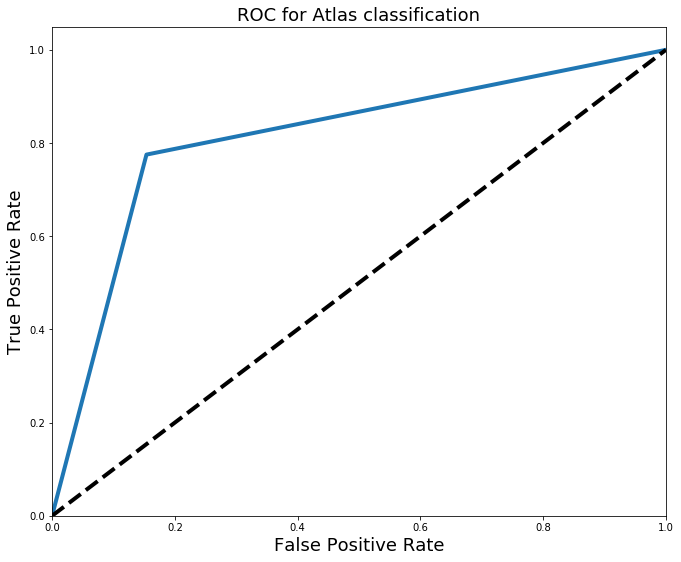

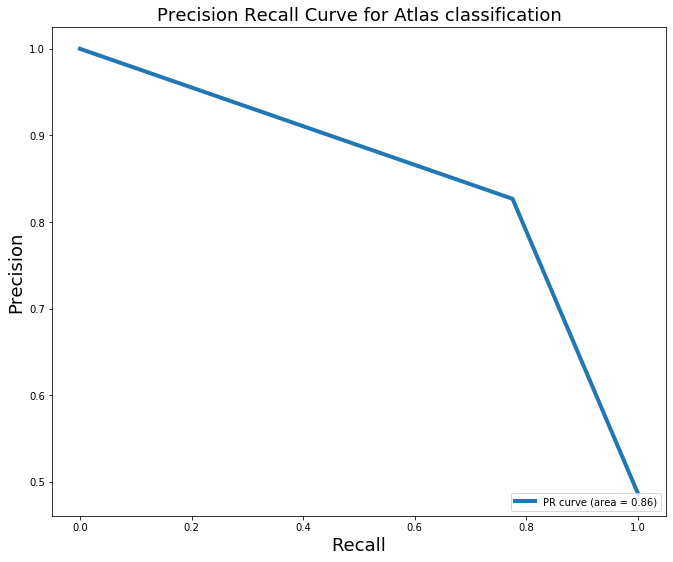

In [53]:
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

FPR, TPR, _ = roc_curve(y_test, y_pred)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Atlas classification', fontsize= 18)
plt.show()
#Precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Atlas classification', fontsize=18)
plt.legend(loc="lower right")
plt.show()